!pip install pydantic
!pip install PyYAML
!pip install jinja2
!pip install visions
!pip install htmlmin
!pip install phik
!pip install requests
!pip install tqdm
!pip install seaborn
!pip install multimethod
!pip install statsmodels
!pip install typeguard
!pip install imagehash
!pip install wordcloud
!pip install dacite
!pip install numba
!pip install uvicorn
!pip install python-multipart
!pip install kaleido
!pip install fastapi

import sys
!{sys.executable} -m pip install -U ydata-profiling
!jupyter nbextension enable --py widgetsnbextension

In [220]:
import pandas as pd
from scipy.io import arff
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
#Diviser le data entre deux partie (train ,test)
from sklearn.model_selection import train_test_split
import pandas as pd
from scipy.io import arff
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
#Let's start with importing necessary libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
#
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
#
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [221]:
df = pd.read_csv("C:/Tempp/cind820/diabetes.csv")

In [222]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [223]:
# Generates descriptive statistics of numerical columns in the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [224]:
#Returns the number of rows and columns in the dataset.
df.shape

(768, 9)

In [225]:
df.isnull().sum()  # Sum of missing values per column

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [226]:
correlation_matrix = df.corr()

In [227]:
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose              

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [229]:
#How many “zeros” are in each column of the data frame (df)?
for colname in df.columns[:8]:
    print('0s in "{variable}": {count}'.format(
        variable=colname,
        count=np.count_nonzero(df[colname] == 0)))

0s in "Pregnancies": 111
0s in "Glucose": 5
0s in "BloodPressure": 35
0s in "SkinThickness": 227
0s in "Insulin": 374
0s in "BMI": 11
0s in "DiabetesPedigreeFunction": 0
0s in "Age": 0


In [230]:
# now replacing zero values with the mean of the column
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [231]:
#Now we have less zero in each column?
for colname in df.columns[:8]:
    print('0s in "{variable}": {count}'.format(
        variable=colname,
        count=np.count_nonzero(df[colname] == 0)))

0s in "Pregnancies": 111
0s in "Glucose": 0
0s in "BloodPressure": 0
0s in "SkinThickness": 0
0s in "Insulin": 0
0s in "BMI": 0
0s in "DiabetesPedigreeFunction": 0
0s in "Age": 0


# 

Diviser le data entre X et Y :
X : pour les colonnes d’entrer
Y : pour la colonne de outcome

In [232]:
target_name ="Outcome"

In [233]:
Y = df[target_name]
X = df.drop(target_name, axis=1)

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
df['Outcome'].value_counts() # counting how many diabetes (1) and no diabetes (0)

Outcome
0    500
1    268
Name: count, dtype: int64

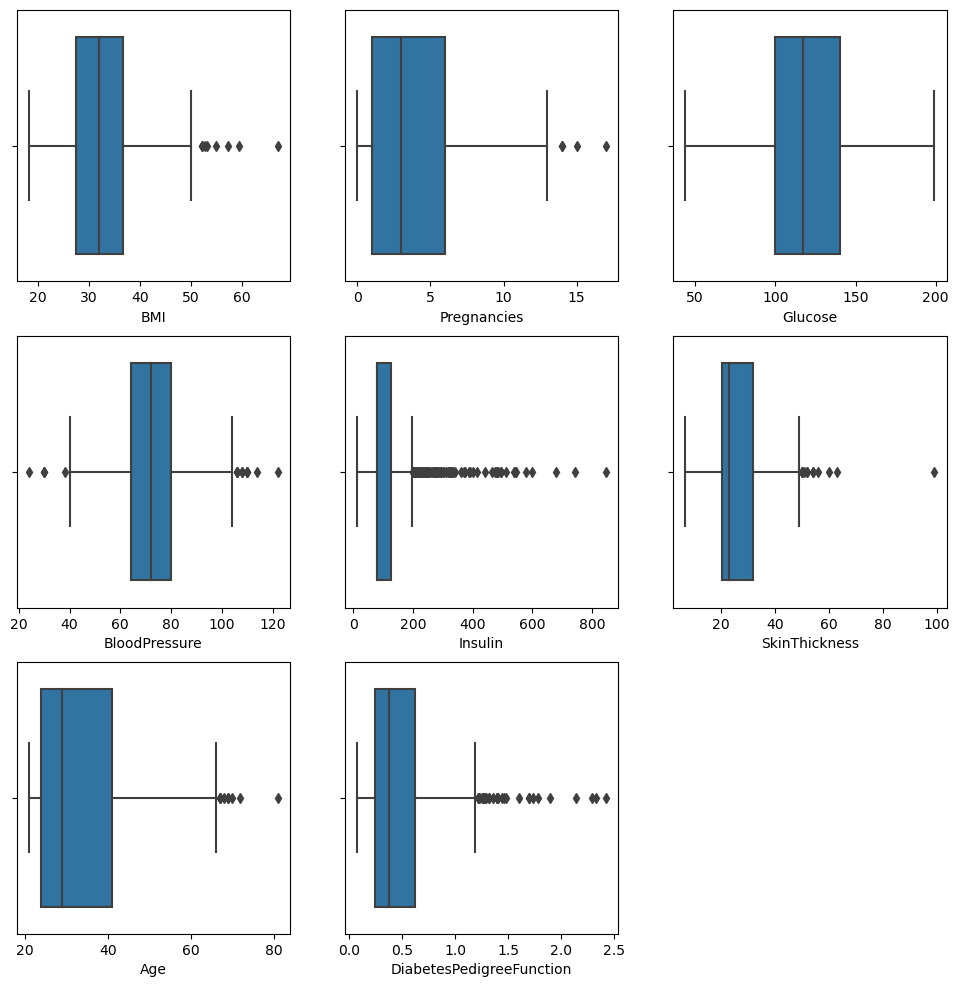

In [236]:
#boxplots  >display the distribution and spread of data for each feature,
plt.figure(figsize=(12,12))
for i, col in enumerate(['BMI','Pregnancies', 'Glucose', 'BloodPressure', 'Insulin' ,'SkinThickness', 'Age','DiabetesPedigreeFunction']):
    plt.subplot(3,3 ,i+1)
    sns.boxplot(x=col , data =df)
plt.show()

In [237]:
#Outlier Observation Analysis
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")


Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [238]:
import pandas as pd
import numpy as np

# Create a copy of the dataframe to work with
df_cleaned = df.copy()

# Define a function for Winsorization
def winsorize(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Winsorize the series
    series = np.where(series < lower_bound, lower_bound, series)
    series = np.where(series > upper_bound, upper_bound, series)
    return series

# Apply Winsorization to all features except 'Glucose'
for feature in df_cleaned.columns:
    if feature != 'Glucose':
        df_cleaned[feature] = winsorize(df_cleaned[feature])

# Output the dataframe after Winsorization
print(df_cleaned)


     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6.0    148.0           72.0      35.000000   79.799479  33.6   
1            1.0     85.0           66.0      29.000000   79.799479  26.6   
2            8.0    183.0           64.0      20.536458   79.799479  23.3   
3            1.0     89.0           66.0      23.000000   94.000000  28.1   
4            0.0    137.0           40.0      35.000000  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763         10.0    101.0           76.0      48.000000  180.000000  32.9   
764          2.0    122.0           70.0      27.000000   79.799479  36.8   
765          5.0    121.0           72.0      23.000000  112.000000  26.2   
766          1.0    126.0           60.0      20.536458   79.799479  30.1   
767          1.0     93.0           70.0      31.000000   79.799479  30.4   

     DiabetesPedigreeFunction   Age  Outcome  
0                       0.62

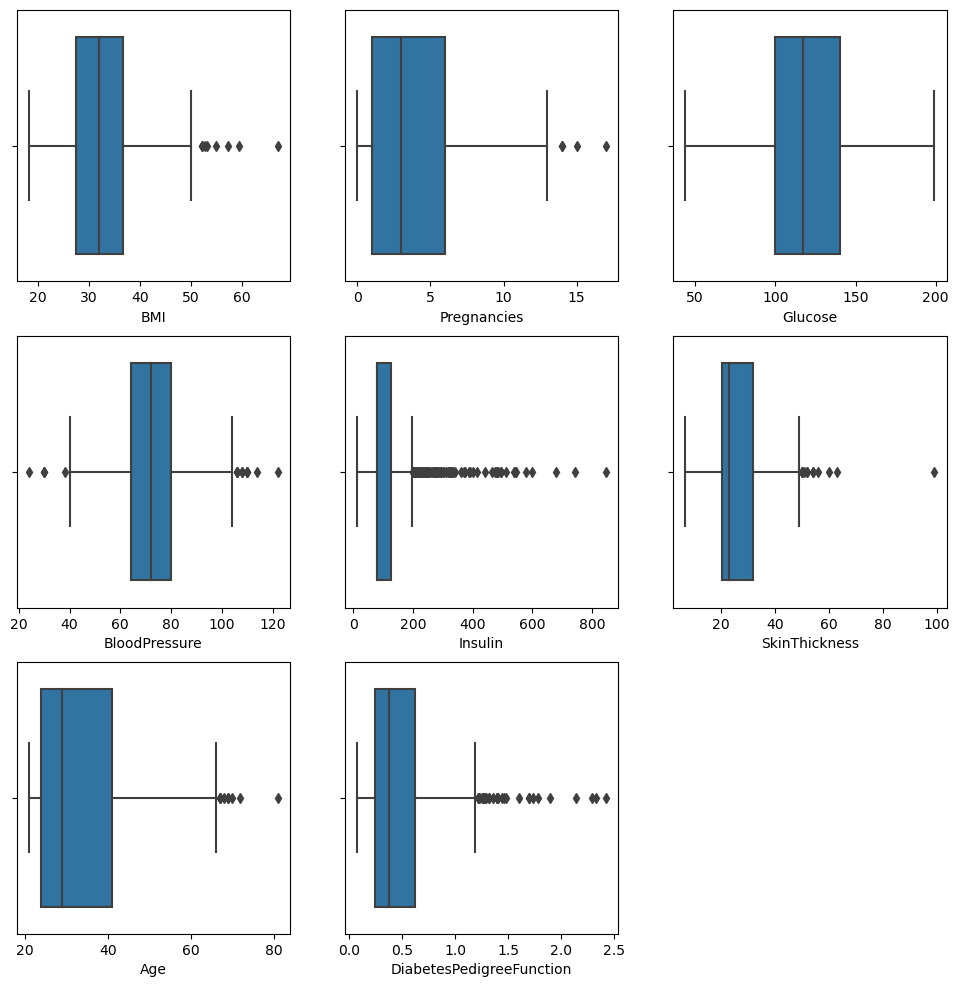

In [239]:
#boxplots  >display the distribution and spread of data for each feature,
plt.figure(figsize=(12,12))
for i, col in enumerate(['BMI','Pregnancies', 'Glucose', 'BloodPressure', 'Insulin' ,'SkinThickness', 'Age','DiabetesPedigreeFunction']):
    plt.subplot(3,3 ,i+1)
    sns.boxplot(x=col , data =df)
plt.show()

In [240]:
#Outlier Observation Analysis
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in df:
    
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")


Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


# Logistic regression

In [241]:
# splitting a dataset into training and testing sets for machine learning models
from sklearn.model_selection import train_test_split
test_size = 0.20
seed = 12
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [242]:
# implementation of logistic regression using scikit-learn (sklearn) library for a binary classification task.
#This imports the logistic regression class from the scikit-learn linear_model module. Logistic regression
from sklearn.linear_model import LogisticRegression
#This initializes a logistic regression model
model = LogisticRegression(max_iter=1000)
#  train the logistic regression model using the training data. #X_train  and Y_train.
model.fit(X_train, Y_train)
#calculates the accuracy of the trained model on the test dataset. 
result = model.score(X_test, Y_test)
print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 81.169%


In [243]:
# implementation of logistic regression using scikit-learn (sklearn) library for a binary classification task.
#This imports the logistic regression class from the scikit-learn linear_model module. Logistic regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assume X_train, X_test, Y_train, and Y_test are already defined

# Initialize a StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




In [244]:
# Initialize a logistic regression model
model = LogisticRegression()



In [245]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assume X, Y are your features and target variable respectively

# Set the number of folds and the random seed
num_folds = 10
seed = 7

# Initialize KFold with shuffle=True and random_state=seed
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

# Initialize a logistic regression model with a different solver
model = LogisticRegression(solver='liblinear', max_iter=1000)

# Initialize a StandardScaler
scaler = StandardScaler()

# Fit the scaler on the entire dataset and then transform both the features
X_scaled = scaler.fit_transform(X)

# Perform cross-validation
scores = cross_val_score(model, X_scaled, Y, cv=kfold)

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard deviation:", scores.std())


Scores: [0.80519481 0.72727273 0.75324675 0.80519481 0.80519481 0.77922078
 0.64935065 0.77922078 0.81578947 0.76315789]
Mean: 0.7682843472317157
Standard deviation: 0.047605336949830934


In [246]:
# Train the logistic regression model on the entire dataset
model.fit(X_scaled, Y)

# Calculate the accuracy of the trained model on the entire dataset
result = model.score(X_scaled, Y)

print(("Accuracy: %.3f%%") % (result*100.0))

Accuracy: 78.125%


# Decision Tree

In [247]:
#split the dataset into training and testing subsets. test_size=0.2  ,train size = 0.80
X_trainDT, X_testDT, Y_trainDT, Y_testDT = train_test_split(X,Y,test_size=0.2,random_state=0)
scalerDT = StandardScaler()

In [248]:
#StandardScaler is a class from sklearn.preprocessing module.
#It is used for standardizing features by removing the mean and scaling to unit variance.
#creates an instance of StandardScaler and assigns it to the variable scalerDT.
#After the function call, it assigns the resulting subsets to 
X_trainDT = scalerDT.fit_transform(X_trainDT)
X_testDT = scalerDT.transform(X_testDT)


In [249]:
#create an instance of DecisionTreeClassifier and assigns it to the variable DecisionTree_Class_Model.
DecisionTree_Class_Model = DecisionTreeClassifier()
# trains the decision tree model using the training data (X_trainDT and Y_trainDT).
DecisionTree_Class_Model.fit(X_trainDT,Y_trainDT)

DecisionTreeClassifier()

In [250]:
# takes the test data (X_testDT) as input and predicts the target variable (Diabetic )
Y_predDT = DecisionTree_Class_Model.predict(X_testDT)

#Create a DataFrame provides a side-by-side comparison of the actual outcome 
#and the predicted outcome for the test data
pd.DataFrame({"Actual_Outcome":Y_testDT, "Predicted_Outcome":Y_predDT})

,Actual_Outcome,Predicted_Outcome
661,1,1
122,0,0
113,0,0
14,1,1
529,0,0
...,...,...
476,1,0
482,0,0
230,1,0
527,0,0


In [251]:
from sklearn.metrics import classification_report
reportDT = pd.DataFrame(classification_report(Y_testDT, Y_predDT, output_dict=True)).transpose()
reportDT

,precision,recall,f1-score,support
0,0.834951,0.803738,0.819048,107.000000
1,0.588235,0.638298,0.612245,47.000000
accuracy,0.753247,0.753247,0.753247,0.753247
macro avg,0.711593,0.721018,0.715646,154.000000
weighted avg,0.759655,0.753247,0.755933,154.000000


# Apply DecisionTree with Cross-validation

In [252]:


# Assuming X and Y are already defined
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit the model
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_scaled, Y_train)

# Cross-validation
cv_scores = cross_val_score(decision_tree_model, X_train_scaled, Y_train, cv=5) # You can adjust the number of folds in cv parameter
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Optionally, you can also assess the model on the test set
test_accuracy = decision_tree_model.score(X_test_scaled, Y_test)
print("Test set accuracy:", test_accuracy)


Cross-validation scores: [0.68292683 0.64227642 0.64227642 0.64227642 0.7295082 ]
Mean cross-validation score: 0.6678528588564575
Test set accuracy: 0.7727272727272727


# Random forest


In [253]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [254]:
# Building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

In [255]:
# Fitting the Model to the Training Data
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

In [256]:
# Predicting the Test Data
Y_pred = model.predict(X_test)

In [257]:
# Evaluating the Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Precision:', precision_score(Y_test, Y_pred))
print('Recall:', recall_score(Y_test, Y_pred))
print('F1-score:', f1_score(Y_test, Y_pred))

Accuracy: 0.7922077922077922
Precision: 0.7659574468085106
Recall: 0.631578947368421
F1-score: 0.6923076923076923


In [258]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Splitting the data into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=0)

# Cross-validation
cv_scores = cross_val_score(model, X_train_scaled, Y_train, cv=5) # You can adjust the number of folds in cv parameter
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# Fitting the Model to the Training Data
model.fit(X_train_scaled, Y_train)

# Predicting the Test Data
Y_pred = model.predict(X_test_scaled)

# Evaluating the Model
print('Accuracy:', accuracy_score(Y_test, Y_pred))
print('Precision:', precision_score(Y_test, Y_pred))
print('Recall:', recall_score(Y_test, Y_pred))
print('F1-score:', f1_score(Y_test, Y_pred))


Cross-validation scores: [0.7398374  0.78861789 0.71544715 0.79674797 0.74590164]
Mean cross-validation score: 0.7573104091696654
Accuracy: 0.7922077922077922
Precision: 0.7659574468085106
Recall: 0.631578947368421
F1-score: 0.6923076923076923
